In [8]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [9]:

headers = ['Alloc Color Storage','Alloc gray Storage', 'Data2GDDR','Grayscale Kerneltime', 'Data2Img','All']
df = pd.read_csv('./CUDAreservation_Ilona.csv',header = 0)
df_2 = pd.read_csv('./CUDAreservation_thomas.csv',header = 0)

In [10]:
df=df.apply(lambda x: pd.to_numeric(x, errors = 'coerce')).dropna()


In [11]:
allocation_color_duration_ilona=df['Alloc Color Storage'].mean()
allocation_gray_duration_ilona=df['Alloc gray Storage'].mean()
allocation_gpu_ilona=df['Data2GDDR'].mean()
grayscale_gpu_ilona=df['Grayscale Kerneltime'].mean()
gpu_host_ilona=df['Data2Img'].mean()
all_host_ilona=df['All'].mean()

In [12]:
allocation_color_duration_thomas=df_2['Alloc Color Storage'].mean()
allocation_gray_duration_thomas=df_2['Alloc gray Storage'].mean()
allocation_gpu_thomas=df_2['Data2GDDR'].mean()
grayscale_gpu_thomas=df_2['Grayscale Kerneltime'].mean()
gpu_host_thomas=df_2['Data2Img'].mean()
all_host_thomas=df_2['All'].mean()

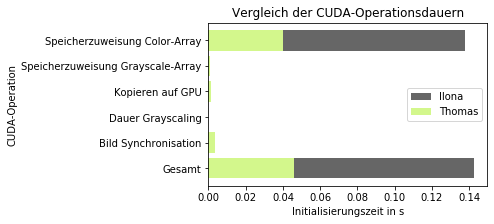

In [14]:
width = 0.2
barwidth=0.4

zeiten_ilona= [allocation_color_duration_ilona, allocation_gray_duration_ilona, allocation_gpu_ilona, grayscale_gpu_ilona, gpu_host_ilona, all_host_ilona]
zeiten_thomas= [allocation_color_duration_thomas, allocation_gray_duration_thomas, allocation_gpu_thomas, grayscale_gpu_thomas, gpu_host_thomas, all_host_thomas]
zeiten_ilona=zeiten_ilona[::-1]
zeiten_thomas=zeiten_thomas[::-1]
werte =['Speicherzuweisung Color-Array','Speicherzuweisung Grayscale-Array', 'Kopieren auf GPU', 'Dauer Grayscaling','Bild Synchronisation','Gesamt']
werte=werte[::-1]
pos = np.arange(len(werte))
 
plt.barh(pos, zeiten_ilona, color = '#666666ff', label= 'Ilona')
plt.barh(pos, zeiten_thomas, color = '#d3f78cff', label= 'Thomas')
plt.xlabel('Initialisierungszeit in s')
plt.ylabel('CUDA-Operation')
plt.title('Vergleich der CUDA-Operationsdauern')
plt.yticks(pos, werte)
plt.legend()

plt.rcParams["figure.figsize"] = (4,3)
plt.savefig('CUDA_operations.png',bbox_inches = "tight") 

